In [419]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [420]:
output_path = 'output/models/'

import os
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [421]:
# Import prospective dataset
df = pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [422]:
# Exploring outcome of intrest
print("Unique values for tumour type {}".format(df['PATHOLOGY'].unique()))
print("Number of patients with tumour type missing {}".format(sum(df['PATHOLOGY'].isnull())))
print("Distribution of tumor type \n{}".format(df['PATHOLOGY'].value_counts()))

Unique values for tumour type ['Benign' 'Malign' nan]
Number of patients with tumour type missing 145
Distribution of tumor type 
Malign    2603
Benign     647
Name: PATHOLOGY, dtype: int64


In [423]:
# drop records with no target variable
df = df[df['PATHOLOGY'].notnull()].copy()

In [424]:
# Encode the target variable
df['PATHOLOGY'] = df['PATHOLOGY'].map({'Benign':1,'Malign':0}).copy()

In [425]:
df_ori = df.copy()

In [426]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 3250
Number of variables in Combined dataset 161


In [427]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [428]:
df.head(5)

,PATIENTNUMBER,PROCNAME,CENTERCODE,SURGEONCODE,RECPROGRESS,CREATEDDATE,GENDER,DATEOFBIRTH,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,ECOG,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,SYMPTOMS,SOLITARYKIDNEY,TYPEOFSOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,PREOPMULTIFOCALITY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,UCSINVASION,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,CM,R.E.N.A.L.NEPHROSCORE,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,EXOPHYTICENDOPHYTICPROPERTIES,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,TumorConsistencyonImaging,BosniakClassification,DATEOFSURGERY,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ImagingFeaturesofotherexcisedtumor,Consistencyoftheotherexcisedtumors,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,PRIMARYSURGEON,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,HAEMOSTATICDetails,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,SURGICALCONSIDERATIONS,INTRAOPCOMPLICATION,INTRAOPCOMPLICATIONS,NeedtoConverttoRadicalNephrectomy,TREATMENTOFCOMPLICATION,POSTOPCOMPLICATION,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,POSTOPTREATMENTOFCOMPLICATION,CLAVIENGRADE,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPEMALIGNANAT,HYSTOTYPEMALIGNANATYES,HYSTOTYPEBENIGN,HYSTOTYPEBENIGNYES,FUHRMANGRADING,SARCOMATOIDDIFF,SARCOMATOIDDIFF_A,NECROSIS,MICROVENOUSINVASION,UCSINVASION_A,PERIRENALFATINVASION,HilarFatInvasion,SINUSFATINVASION,MICSCORE,ADRENALINVASION,GEROTAINVASION,RenalVeinInvasion,VENOUSTHROMBUS,SURGICALMARGIN,UNIFOCALMULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITEOFPOSITIVENODE,TREATMENTPSM,PT,PN,OTHERTUMORS,DATEOFRECURRENCE,LASTFOLLOWUPDURATION,TIMETORECURRENCE,LASTFOLLOWUPSTATUS,LASTFOLLOWUPRECURRENCE,LASTTREATMENTOFRECURRENCE,TYPEOFCOMPLICATIONSs,SELECTEDSURGICALCOMPLICATIONSs,SELECTEDNONSURGICALCOMPLICATIONSs,TREATMENTOFCOMPLICATIONSs,RECURRENCEs,FOLLOWUPDATEs,STATUSs,TREATMENTs,CREATININEs,EGFRs,SRFs,ERPFs,Year
0,10PAT000065,Partial Nephrectomy,U5WT3NOY,QIG8PUOL,Pathology completed,2018-11-18 13:00:00.0,Male,1964.0,54.0,Married,White/Caucasian,Not Provided,NaN,NaN,NaN,NaN,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,NaN,Lower Pol,15.4,48.0,6300.0,8.10,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-21 00:00:00.0,Category 2,Relative,No,1.0,NaN,NaN,Transperitoneal,Xi,4-arms,Only 12 mm,No,Staff,02:30,Warm,Bulldog,No,No,No,Used,Yes,Yes,31.0,Performed,Yes,Surgiflo,Not Performed,50.0,No,NaN,No,NaN,No,NaN,Complications,NaN,"321,323","IV antibiotics, discharged with oral antibiotics",Grade 2: Complications needing only use of int...,13.699999999999999,45,1.14,63,12900,999,999,999,999,NaN,13,35,"0,9",61,4300,5.0,8.0,NaN,NaN,Absent,1,No,NaN,Yes,Angiomyolipoma,NaN,Absent,NaN,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,Absent,Negative,NaN,NaN,NaN,NaN,Wait and Watch,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
1,13PAT000522,Partial Nephrectomy,08ZMCILJ,G4X4XVDW,Pathology completed,2018-04-22 18:30:00.0,Male,1957.0,61.0,Married,Mongoloid/Asian,Graduate,70.0,167.0,25.10,33.0,"Fully active, able to carry on all pre-disease...",0.0,3.0,Absent,Yes,Left,No,Left,Left,No,Anterior,Lower Pol,12.3,39.4,5400.0,1.25,NaN,58.72,NaN,9.0,2(Intermidiate Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),Tumours wi

In [429]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 161 columns):
PATIENTNUMBER                         3250 non-null object
PROCNAME                              3250 non-null object
CENTERCODE                            3250 non-null object
SURGEONCODE                           889 non-null object
RECPROGRESS                           3250 non-null object
CREATEDDATE                           3250 non-null object
GENDER                                3240 non-null object
DATEOFBIRTH                           1934 non-null float64
AGEATSURGERY                          3237 non-null float64
MARITALSTATUS                         2094 non-null object
RACE                                  2023 non-null object
EDUCATION                             1860 non-null object
WEIGHT                                2282 non-null float64
HEIGHT                                2280 non-null float64
BMI                                   2903 non-null float64
CLI

### Define numeric columns and replace encoded missing values with NaN

In [432]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'PADUASCORE',
] 

In [433]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [434]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,PATHOLOGY,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,INTRA_OP_COMPLICATIONS
count,1934.00,3237.00,2282.00,2280.00,2903.00,3075.00,2718.00,2656.00,2439.00,2344.00,2043.00,3191.00,125.00,2531.00,154.00,2059.00,1946.00,2690.00,3017.00,3150.00,1236.00,1415.00,2268.00,1758.00,914.00,557.00,598.00,779.00,567.00,482.00,426.00,436.00,639.00,397.00,416.00,3126.00,2914.00,1530.00,649.00,3250.0,2750.00,1407.00,2423.00,2029.00,1908.00,3247.00,3250.00
mean,1956.11,57.77,89.69,163.81,28.71,34.24,1.54,3.55,19.46,45.27,7166.02,3.93,602.29,80.35,701.02,8.42,1.89,1.06,19.87,186.73,48.45,57.41,18.49,96.87,1916.78,163.05,159.62,106.46,211.90,2696.70,220.75,255.06,137.01,282.34,2705.99,3.83,10.93,73.15,194.06,0.2,130.47,15.02,0.28,1.09,16.89,2013.26,0.06
std,13.26,12.74,50.01,40.39,5.95,34.33,2.01,2.29,74.46,96.06,3330.93,53.03,464.47,30.57,408.16,1.75,0.82,0.30,37.27,226.01,175.26,161.25,129.81,168.04,4190.26,348.56,335.21,306.40,342.95,4942.51,403.37,412.06,342.48,395.42,4129.17,25.30,23.78,252.91,386.00,0.4,333.90,142.76,0.45,31.36,19.59,2.98,0.23
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,16.84,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,0.0,1.00,-999.00,0.00,0.00,0.00,2006.00,0.00
25%,1947.00,49.00,69.00,160.00,24.60,22.00,0.00,2.00,12.90,36.00,5600.00,0.78,74.00,65.30,166.50,7.00,1.00,1.00,14.00,50.00,11.00,30.50,0.97,52.17,9.20,10.80,27.00,0.91,49.36,9.40,10.70,28.50,0.90,55.00,8.98,2.00,2.40,1.00,2.00,0.0,2.00,0.00,0.00,0.00,3.00,2011.00,0.00
50%,1955.00,59.00,80.00,169.00,27.60,30.00,1.00,3.00,13.90,40.80,6960.00,0.91,999.00,79.21,999.00,8.00,2.00,1.00,18.00,100.00,12.10,35.00,1.00,64.94,11.50,12.20,34.00,1.17,67.51,11.95,12.10,34.95,1.12,74.00,999.00,3.00,3.60,2.00,5.00,0.0,2.00,0.00,0.00,0.00,10.00,2013.00,0.00
75%,1965.00,67.00,93.88,176.00,31.78,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,999.00,93.84,999.00,10.00,3.00,1.00,23.00,200.00,13.30,38.30,1.30,80.50,18.40,14.40,40.38,1.58,94.15,3930.00,14.00,44.02,1.52,113.00,4300.00,4.00,8.50,5.00,25.00,0.0,3.00,0.00,1.00,0.00,24.00,2016.00,0.00
max,1998.00,89.00,999.00,999.00,55.60,999.00,19.00,18.00,999.00,999.00,56000.00,999.00,999.00,999.00,999.00,14.00,3.00,6.00,999.00,3500.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,1.0,999.00,999.00,1.00,999.00,101.00,2018.00,1.00


In [435]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [436]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [437]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,PATHOLOGY,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,INTRA_OP_COMPLICATIONS
count,1934.00,3237.00,2274.00,2277.00,2903.00,3072.00,2718.00,2656.00,2425.00,2321.00,2023.00,3182.00,53.00,2516.00,54.00,2059.00,1946.00,2690.00,3013.00,3147.00,1196.00,1375.00,2229.00,1696.00,871.00,475.00,516.00,697.00,473.00,456.00,336.00,334.00,552.00,302.00,327.00,3124.00,2913.00,1422.00,527.00,3250.0,2396.00,1375.00,2423.00,2027.00,1908.00,3247.00,3250.00
mean,1956.11,57.77,88.47,162.71,28.71,33.29,1.54,3.55,13.80,35.82,7226.99,1.11,63.37,79.88,149.21,8.42,1.89,1.06,18.57,185.96,16.66,30.01,1.33,66.02,1962.09,18.74,26.23,1.46,63.09,2793.50,12.29,27.87,1.16,65.84,3170.58,3.20,10.59,4.10,11.13,0.2,2.15,0.12,0.28,0.11,16.89,2013.26,0.06
std,13.26,12.74,37.65,26.70,5.95,16.41,2.01,2.29,1.76,14.55,3290.13,3.33,22.51,24.54,56.27,1.75,0.82,0.30,10.78,224.72,22.14,13.97,4.68,21.64,4287.47,27.34,15.74,6.57,24.75,5064.60,10.97,22.46,0.57,36.85,4548.94,2.46,15.18,10.41,46.67,0.4,0.67,2.28,0.45,0.64,19.59,2.98,0.23
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,16.84,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.00,2006.00,0.00
25%,1947.00,49.00,69.00,160.00,24.60,22.00,0.00,2.00,12.90,36.00,5600.00,0.78,43.57,65.06,110.00,7.00,1.00,1.00,14.00,50.00,11.00,30.20,0.96,51.86,9.10,10.70,0.47,0.90,46.91,9.20,10.40,25.25,0.86,49.17,8.40,2.00,2.40,1.00,1.80,0.0,2.00,0.00,0.00,0.00,3.00,2011.00,0.00
50%,1955.00,59.00,80.00,169.00,27.60,30.00,1.00,3.00,13.90,40.80,7000.00,0.91,59.00,79.00,132.00,8.00,2.00,1.00,18.00,100.00,12.00,35.00,1.00,64.00,11.30,11.90,32.60,1.10,62.52,11.51,11.60,32.75,1.07,65.00,11.60,3.00,3.60,2.00,3.00,0.0,2.00,0.00,0.00,0.00,10.00,2013.00,0.00
75%,1965.00,67.00,93.41,176.00,31.78,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,84.00,93.43,177.75,10.00,3.00,1.00,23.00,200.00,13.20,38.00,1.29,78.34,15.60,13.20,36.82,1.40,79.00,5210.00,12.70,36.98,1.27,80.00,6450.00,4.00,8.50,4.00,8.00,0.0,3.00,0.00,1.00,0.00,24.00,2016.00,0.00
max,1998.00,89.00,377.00,208.30,55.60,135.00,19.00,18.00,39.60,88.00,56000.00,96.00,116.80,253.97,340.00,14.00,3.00,6.00,320.00,3500.00,162.00,96.80,143.00,198.30,19610.00,152.00,51.00,174.00,157.70,27780.00,131.00,332.00,5.80,543.00,16060.00,51.00,115.00,240.00,979.00,1.0,4.00,70.00,1.00,12.00,101.00,2018.00,1.00


In [438]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [439]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

### Define Categorical columns

In [440]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
#'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [441]:
# list of variables included for Intra-Op complications 
intra_op_col = [
'PATIENTNUMBER',
#'PROCNAME',
'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
#'Consistencyoftheotherexcisedtumors',
#'ACCESS',
#'DAVINCIMODEL',
#'ROBOTICSARMS',
#'ASSISTENTTROCARS',
#'DUALCONSOLE',
#'PRIMARYSURGEON',
#'OPERATIVETIMEmin',
#'ISCHEMIA',
#'CLAMPARTERY',
#'SELECTIVEARTERIALCLAMPING',
#'CLAMPVEIN',
#'EARLYUNCLAMPING',
#'FLUORESCENCE',
#'INNERRENORRHAPHY',
#'OUTERRENORRHAPHY',
#'ISCHEMIATIMEmin',
#'UCSREPAIR',
#'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails',
#'LYMPHNODEDISSECTIONLND',
#'BLOODLOSSml',
#'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS',
#'INTRAOPCOMPLICATION',
#'INTRAOPCOMPLICATIONS',
'PATHOLOGY'    
]

In [442]:
len(intra_op_col)

49

### Data Cleaning

In [443]:
# Selecting dataframe relevant columsn for analysis
df = df[intra_op_col].copy()

In [444]:
#Keep columns having less than 50% missing data
print("Total number of columns before removing columns with more than 50% missing data: {}".format(len(list(df))))

df = df[df.columns[df.isnull().mean() <= 0.50]].copy()

print("Total number of columns left after removing columns with more than 50% missing data: {}".format(len(list(df))))

Total number of columns before removing columns with more than 50% missing data: 49
Total number of columns left after removing columns with more than 50% missing data: 43


In [445]:
target = 'PATHOLOGY'

In [446]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,PATHOLOGY
count,3237.000000,2903.000000,3072.000000,2718.000000,2425.000000,2321.000000,2023.000000,3182.000000,2516.000000,1946.000000,2690.000000,3250.000000
mean,57.765524,28.714404,33.293066,1.536424,29.989798,41.349203,7540.964380,1.111460,79.881535,1.894656,1.056877,0.199077
std,12.737667,5.945862,16.410901,2.011185,118.311433,6.142349,5008.338934,3.328815,24.539709,0.818615,0.295181,0.399367
min,16.000000,15.100000,0.000000,0.000000,10.000000,10.400000,0.000000,0.000000,0.020000,1.000000,0.000000,0.000000
25%,49.000000,24.600000,22.000000,0.000000,12.900000,38.400000,5700.000000,0.780000,65.062500,1.000000,1.000000,0.000000
50%,59.000000,27.600000,30.000000,1.000000,14.000000,41.600000,7100.000000,0.910000,79.000000,2.000000,1.000000,0.000000
75%,67.000000,31.780000,42.000000,2.000000,15.000000,44.600000,8521.500000,1.100000,93.430603,3.000000,1.000000,0.000000
max,89.000000,55.600000,135.000000,19.000000,990.000000,180.000000,186000.000000,96.000000,253.971416,3.000000,6.000000,1.000000


In [447]:
numeric_stats = df.describe()

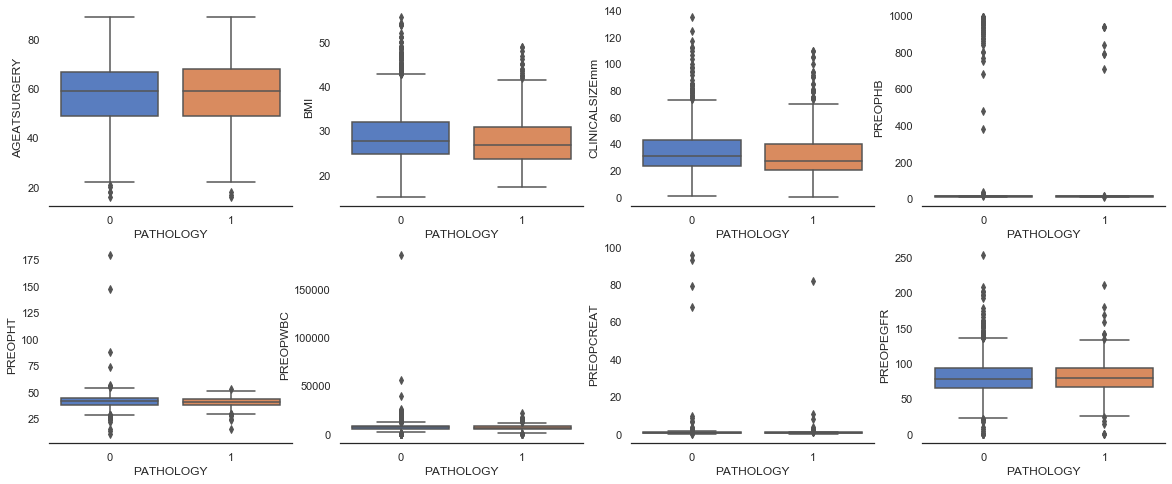

In [448]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])

In [449]:
# Check the number of outliers
outlier_dict = {}
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    outlier_dict.update({i:{'LL':LL,'UL':UL}})
    print('{:<14s} {:>4d} {:>4d}'.format(i,len(df.loc[(df[i]>=UL)]),len(df.loc[(df[i]<=LL)])), 'UL-LL {:>4.2f}-{:>4.2f}'.format(UL,LL))
print(outlier_dict)

BMI              93    0 UL-LL 42.55-13.83
CLINICALSIZEmm   75    0 UL-LL 72.00--8.00
PREOPHB          53    0 UL-LL 18.15-9.75
PREOPHT           8   33 UL-LL 53.90-29.10
PREOPWBC         80   39 UL-LL 12753.75-1467.75
PREOPCREAT      153    2 UL-LL 1.58-0.30
PREOPEGFR        49   24 UL-LL 135.98-22.51
{'BMI': {'LL': 13.830000000000002, 'UL': 42.55}, 'CLINICALSIZEmm': {'LL': -8.0, 'UL': 72.0}, 'PREOPHB': {'LL': 9.75, 'UL': 18.15}, 'PREOPHT': {'LL': 29.099999999999994, 'UL': 53.900000000000006}, 'PREOPWBC': {'LL': 1467.75, 'UL': 12753.75}, 'PREOPCREAT': {'LL': 0.29999999999999993, 'UL': 1.58}, 'PREOPEGFR': {'LL': 22.510346044147354, 'UL': 135.98275659308774}}


In [450]:
#Export the outlier dict
import json
with open(output_path + "outlier_dict.json", "w") as write_file:
    json.dump(outlier_dict, write_file)

In [451]:
#replacing inaccurate readings with missing values
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [452]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,PATHOLOGY
count,2718.000000,2428.000000,2611.000000,2288.000000,2052.000000,1953.000000,1656.000000,2684.000000,2071.000000,1599.000000,2253.000000,2731.000000
mean,57.611479,28.121623,31.746687,1.486014,13.924834,41.620174,7170.487886,0.928766,80.895086,1.891807,1.047492,0.202490
std,12.594051,5.073198,13.862023,1.980176,1.440028,4.226695,1925.378652,0.210209,18.695482,0.819919,0.249260,0.401929
min,16.000000,15.100000,0.000000,0.000000,10.000000,29.800000,1840.000000,0.360000,34.000000,1.000000,0.000000,0.000000
25%,49.000000,24.460000,22.000000,0.000000,13.000000,38.900000,5700.000000,0.780000,67.375000,1.000000,1.000000,0.000000
50%,59.000000,27.285000,30.000000,1.000000,14.000000,41.900000,7000.000000,0.900000,80.000000,2.000000,1.000000,0.000000
75%,67.000000,31.252500,40.000000,2.000000,15.000000,44.700000,8300.000000,1.060000,93.000000,3.000000,1.000000,0.000000
max,89.000000,42.500000,71.000000,19.000000,17.800000,53.700000,12700.000000,1.570000,135.858078,3.000000,4.000000,1.000000


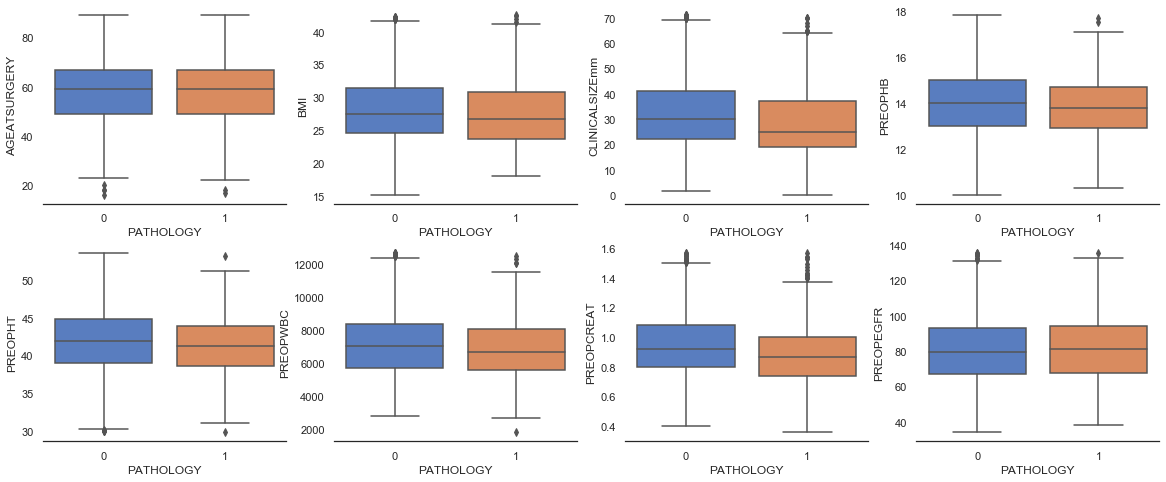

In [453]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])

In [454]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.003662
AGEATSURGERY                          0.004760
MARITALSTATUS                         0.359209
RACE                                  0.390333
EDUCATION                             0.436836
BMI                                   0.110948
CLINICALSIZEmm                        0.043940
ECOG                                  0.459905
CHARLSONSCORE                         0.162212
SYMPTOMS                              0.231051
SOLITARYKIDNEY                        0.142073
BILATERALITYOFTUMOR                   0.385207
SIDEOFTUMOR                           0.325156
SIDEOFSURGERY                         0.002563
FACE                                  0.248261
TUMORlOCATION                         0.131820
PREOPHB                               0.248627
PREOPHT                               0.284877
PREOPWBC                              0.393629
PREOPCREAT   

In [455]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [456]:
# calculate number of records with over 25% missing data
print("Total Records {}".format(len(df)))
print("Records with >=25% missing data {}".format(sum(df['Missing']<= round((len(df.columns)-2)*.30))))
print("Records to be dropped {}".format(len(df) - sum(df['Missing']<= round((len(df.columns)-2)*.30))))

Total Records 2731
Records with >=25% missing data 1646
Records to be dropped 1085


In [457]:
# Check thenumber of missing values for eahc variables if records with a certain missing threshold were removed
df[df['Missing']<= round((len(df.columns)-2)*.30) ].isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.000000
AGEATSURGERY                          0.001215
MARITALSTATUS                         0.089307
RACE                                  0.100851
EDUCATION                             0.126974
BMI                                   0.068651
CLINICALSIZEmm                        0.027947
ECOG                                  0.304374
CHARLSONSCORE                         0.049818
SYMPTOMS                              0.020049
SOLITARYKIDNEY                        0.001215
BILATERALITYOFTUMOR                   0.086270
SIDEOFTUMOR                           0.083232
SIDEOFSURGERY                         0.000000
FACE                                  0.107533
TUMORlOCATION                         0.013973
PREOPHB                               0.021871
PREOPHT                               0.022479
PREOPWBC                              0.109964
PREOPCREAT   

In [458]:
#removing patients with more than 75% missing data
df = df[df['Missing']<= round((len(df.columns)-2)*.30) ].copy()

In [459]:
#Keep columns having less than 10% missing data
df = df[df.columns[df.isnull().mean() <= 0.15]].copy()

print("Total number of columns left after removing columns with missing data: {}".format(len(list(df))))

Total number of columns left after removing columns with missing data: 40


In [460]:
# Print the list of patients with clean data
patient_list = df['PATIENTNUMBER'].tolist()
with open(output_path + 'patient_list.txt', 'w') as f:
    for item in patient_list:
        f.write("%s\n" % item)

In [461]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.000000
AGEATSURGERY                          0.001215
MARITALSTATUS                         0.089307
RACE                                  0.100851
EDUCATION                             0.126974
BMI                                   0.068651
CLINICALSIZEmm                        0.027947
CHARLSONSCORE                         0.049818
SYMPTOMS                              0.020049
SOLITARYKIDNEY                        0.001215
BILATERALITYOFTUMOR                   0.086270
SIDEOFTUMOR                           0.083232
SIDEOFSURGERY                         0.000000
FACE                                  0.107533
TUMORlOCATION                         0.013973
PREOPHB                               0.021871
PREOPHT                               0.022479
PREOPWBC                              0.109964
PREOPCREAT                            0.008505
PADUARISK    

In [462]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [463]:
# Create dictionary mean value for numeric columns
numeric_col_mean_dict = {}
for k in numeric_col_list:
    if k in df.columns:
        numeric_col_mean_dict.update({k:round(df[k].mean())})
print(numeric_col_mean_dict)

{'AGEATSURGERY': 57.0, 'BMI': 28.0, 'CLINICALSIZEmm': 32.0, 'PREOPHB': 14.0, 'PREOPHT': 42.0, 'PREOPWBC': 7097.0, 'PREOPCREAT': 1.0, 'NOOFLESIONS': 1.0, 'CHARLSONSCORE': 1.0}


In [464]:
# export the numeric_col_mean_dict
import json
with open(output_path+ "numeric_col_mean_dict.json", "w") as write_file:
    json.dump(numeric_col_mean_dict, write_file)

In [465]:
# Replacing missing values in numerical columns with their respective mean 
for k in numeric_col_list:
    if k in df.columns:
        df[k].fillna(round(df[k].mean()), inplace = True)

In [466]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 2730
Data columns (total 40 columns):
PATIENTNUMBER                         1646 non-null object
CENTERCODE                            1646 non-null object
GENDER                                1646 non-null object
AGEATSURGERY                          1646 non-null float64
MARITALSTATUS                         1646 non-null object
RACE                                  1646 non-null object
EDUCATION                             1646 non-null object
BMI                                   1646 non-null float64
CLINICALSIZEmm                        1646 non-null float64
CHARLSONSCORE                         1646 non-null float64
SYMPTOMS                              1646 non-null object
SOLITARYKIDNEY                        1646 non-null object
BILATERALITYOFTUMOR                   1646 non-null object
SIDEOFTUMOR                           1646 non-null object
SIDEOFSURGERY                         1646 non-null object
FACE

In [467]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'CENTERCODE': 18,
 'GENDER': 2,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'EDUCATION': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 3,
 'FACE': 3,
 'TUMORlOCATION': 6,
 'PADUARISK': 5,
 'POLARLOCATION': 3,
 'RIMLOCATION': 3,
 'RENALSINUS': 3,
 'EXOPHYTICRATE': 4,
 'CLINICALSIZEGROUP': 4,
 'CT': 6,
 'CN': 4,
 'R.E.N.A.L.NEPHRORISKSTRATIFICATION': 5,
 'RADIUSmaximaldiameterincm': 4,
 'NEARNESSOFTUMOUR': 4,
 'ANTERIORORPOSTERIOR': 4,
 'LOCATIONTOPOLARLINE': 4,
 'ASASCORE': 5,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3}

In [468]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
        df[col] = df[col].astype('category').copy()

In [469]:
# list of features with high number of categories
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

CENTERCODE 18


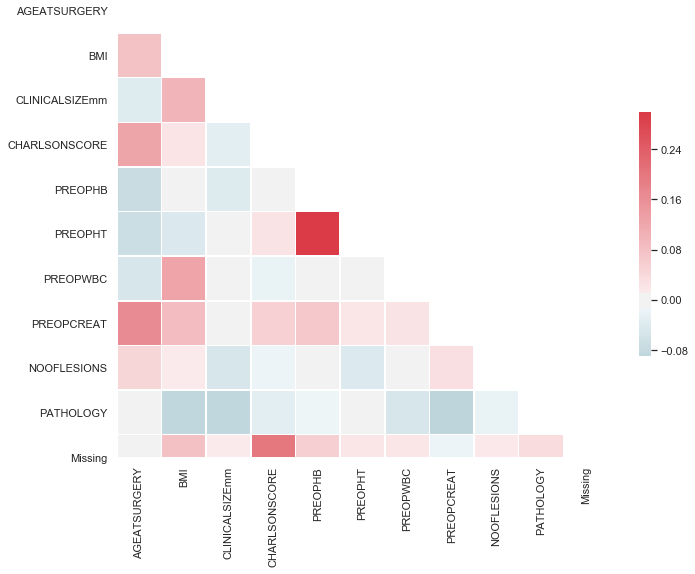

In [470]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [471]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting intra-op complications: {}".format(len(df)))

Number records for predicting intra-op complications: 1646


In [472]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [473]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [474]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'CENTERCODE': {'08ZMCILJ': 0,
  '0VZRZWAI': 1,
  '39HIP3LQ': 2,
  '3QWOG020': 3,
  '4M49I4D5': 4,
  '4UPDM0XB': 5,
  '57T3OUKU': 6,
  '63DCGHNW': 7,
  '94ISQMHX': 8,
  'FWL0MH42': 9,
  'GCIEYK6L': 10,
  'GQHLD5Q4': 11,
  'QRJWT5QR': 12,
  'RETM03Y8': 13,
  'U5WT3NOY': 14,
  'VNO3BPES': 15,
  'VRVRQ639': 16,
  'WGC7XYXZ': 17},
 'GENDER': {'Female': 0, 'Male': 1},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'EDUCATION': {'Graduate': 0,
  'NA': 1,
  'Not Provided': 2,
  'Post Graduate': 3,
  'Upto High School': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDEOFTUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDEOFSURGERY': {'Bilateral': 0, 'Left': 1, 'Right': 2},
 'FACE': 

In [475]:
# export the numeric_col_mean_dict
from joblib import dump
dump(le_dict, output_path + 'Label_enc_dict.joblib')

['output/models/Label_enc_dict.joblib']

In [476]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [477]:
df_codes.head()

,PATIENTNUMBER,CENTERCODE,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,BMI,CLINICALSIZEmm,CHARLSONSCORE,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,PATHOLOGY,Missing
0,13PAT000522,0,1,61.0,1,1,0,25.10,33.0,0.0,0,2,1,1,1,0,0,12.3,39.4,5400.0,1.25,2,2,0,1,0,1,1,1,2,1,0,2,1,2,1,1,1.0,0,0.0
1,11PAT000166,1,1,56.0,1,1,2,23.36,32.0,0.0,0,1,1,1,1,0,0,10.2,36.4,5200.0,0.70,1,2,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1.0,0,2.0
2,15PAT000088,15,0,44.0,3,4,2,29.30,57.0,0.0,1,1,1,1,1,2,2,13.5,41.3,6300.0,0.83,3,1,2,2,1,0,2,1,2,0,0,3,1,1,1,1,1.0,0,1.0
3,11PAT000124,1,0,63.0,1,1,2,32.02,32.0,1.0,0,1,1,3,2,2,0,12.4,36.5,9500.0,1.10,1,2,2,1,1,0,2,1,2,0,2,3,1,1,1,1,1.0,0,2.0
4,15PAT000080,15,1,63.0,3,4,2,25.08,37.0,2.0,0,1,1,3,2,2,4,14.4,42.7,5500.0,1.01,3,1,0,2,1,1,1,1,2,1,0,3,1,1,1,1,1.0,0,1.0


### Create Stats fot dataset

In [478]:
# print median , IQR for numeric columns 
for i in df.columns:#['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    if i in numeric_col_list:
        print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(np.median(df[i]),np.percentile(df[i],25),np.percentile(df[i],75)))

AGEATSURGERY 58.0 [48.0-66.0]
BMI 27.3 [24.3-30.1]
CLINICALSIZEmm 30.0 [22.0-41.0]
CHARLSONSCORE 1.0 [0.0-2.0]
PREOPHB 14.0 [13.1-15.0]
PREOPHT 42.0 [39.2-44.9]
PREOPWBC 7097.0 [5800.0-8100.0]
PREOPCREAT 0.9 [0.8-1.1]
NOOFLESIONS 1.0 [1.0-1.0]


In [479]:
#Print number of records for each category in categorical columns
for i in df_codes.columns:
    if i in cat_col:
        print(pd.DataFrame(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts()))

          CENTERCODE
GCIEYK6L         445
63DCGHNW         211
4UPDM0XB         175
4M49I4D5         170
VNO3BPES         111
08ZMCILJ          94
FWL0MH42          71
0VZRZWAI          71
QRJWT5QR          56
U5WT3NOY          54
WGC7XYXZ          40
RETM03Y8          30
GQHLD5Q4          30
57T3OUKU          29
3QWOG020          25
VRVRQ639          15
39HIP3LQ          13
94ISQMHX           6
        GENDER
Male      1070
Female     576
          MARITALSTATUS
Married            1244
Single              155
NA                  147
Divorced             51
Widowed              49
                 RACE
White/Caucasian   858
Others            341
Mongoloid/Asian   235
NA                166
Black              46
                  EDUCATION
Not Provided            695
Graduate                367
Upto High School        219
NA                      209
Post Graduate           156
                   SYMPTOMS
Absent                 1290
Local Symptoms          292
NA                       33


In [480]:
#traget_stats = pd.merge(df_codes[['PATIENTNUMBER','PATHOLOGY']],
                        #df_ori[['PATIENTNUMBER','PATHOLOGY']], 
                        #left_on='PATIENTNUMBER', 
                        #right_on='PATIENTNUMBER').copy()

In [481]:
#traget_stats

In [482]:
#traget_stats.loc[traget_stats['INTRA_OP_COMPLICATIONS']==1]['INTRAOPTRANSUFUSION'].value_counts()

### Create Train and Test dataset 

In [483]:
df_codes.corr()['PATHOLOGY']

CENTERCODE                            0.064299
GENDER                               -0.171357
AGEATSURGERY                         -0.004208
MARITALSTATUS                         0.035883
RACE                                  0.093014
EDUCATION                            -0.022654
BMI                                  -0.085161
CLINICALSIZEmm                       -0.083725
CHARLSONSCORE                        -0.031411
SYMPTOMS                             -0.004136
SOLITARYKIDNEY                       -0.081418
BILATERALITYOFTUMOR                   0.003422
SIDEOFTUMOR                          -0.046685
SIDEOFSURGERY                        -0.031982
FACE                                  0.009532
TUMORlOCATION                         0.049723
PREOPHB                              -0.012574
PREOPHT                              -0.004336
PREOPWBC                             -0.049146
PREOPCREAT                           -0.089539
PADUARISK                            -0.037887
POLARLOCATION

In [484]:
print('Number of patients {}'.format(len(df_codes)))
print('% of patients with complications {:.2f}%'.format(sum(df_codes['PATHOLOGY'])/len(df_codes)*100))

Number of patients 1646
% of patients with complications 18.53%


In [485]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes['PATHOLOGY'])

In [486]:
# Percentage of complications in trainset
train['PATHOLOGY'].sum()/len(train)

0.18489583333333334

In [487]:
# Percentage of complications in testset
test['PATHOLOGY'].sum()/len(test)

0.1862348178137652

In [488]:
# define data output path
data_path = 'H:/RediMinds/VCQI/Pathology/'
import os
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [489]:
df_codes.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
df_codes.to_csv(data_path+"\VCQI_clean_pathology.csv",index=False)

In [490]:
patient_list_train = train['PATIENTNUMBER'].tolist()
patient_list_test = test['PATIENTNUMBER'].tolist()
from joblib import dump
dump(patient_list_train, output_path + 'patient_list_train.joblib')
dump(patient_list_test, output_path + 'patient_list_test.joblib')

['output/models/patient_list_test.joblib']

In [491]:
# Save train and test dataset

train.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
test.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
train.to_csv(data_path+"VCQI_clean_train_pathology.csv",index=False)
test.to_csv(data_path+"VCQI_clean_test_pathology.csv",index=False)

C:\Users\anubhav\Anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [492]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'\cat_col_pathology', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)